# Network Intrusion Detection System using Machine Learning

## Project Overview

This project implements a machine learning-based intrusion detection system using the NSL-KDD dataset. The goal is to classify network traffic as either normal or malicious, and further extend the system to detect specific types of attacks using multiclass classification.

The project demonstrates the complete machine learning pipeline, including:

- Data preprocessing
- Feature engineering
- Feature selection
- Model training
- Model evaluation
- Hyperparameter tuning
- Cross-validation
- Multiclass classification
- Model deployment readiness

This system simulates real-world intrusion detection used in cybersecurity environments.

In [3]:
print("Notebook Working")

Notebook Working


In [4]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score, roc_curve, auc
from sklearn.svm import LinearSVC

## Problem Definition

### Problem Type: Supervised Learning

This project uses supervised learning, where the model is trained on labeled network traffic data.

### Input (X)

Network traffic features such as:

- duration
- protocol type
- service
- flag
- src_bytes
- dst_bytes
- connection statistics

These features describe the behavior and characteristics of network connections.

### Output (y)

Label indicating whether the network traffic is:

- Normal traffic
- Intrusion attack

In multiclass classification, the model predicts specific attack types such as:

- neptune
- ipsweep
- portsweep
- smurf
- normal

### Goal

The objective is to train a machine learning model capable of accurately detecting and classifying network intrusions.

In [5]:
columns = [
'duration','protocol_type','service','flag','src_bytes','dst_bytes',
'land','wrong_fragment','urgent','hot','num_failed_logins',
'logged_in','num_compromised','root_shell','su_attempted','num_root',
'num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login','is_guest_login','count','srv_count','serror_rate',
'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
'diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
'dst_host_serror_rate','dst_host_srv_serror_rate',
'dst_host_rerror_rate','dst_host_srv_rerror_rate','label','difficulty_level'
]

## Data Preprocessing

The NSL-KDD dataset was used for training and evaluation. The dataset contains 43 features describing network traffic connections.

### Preprocessing steps performed:

- Loaded training dataset (KDDTrain+.txt)
- Loaded testing dataset (KDDTest+.txt)
- Removed unnecessary feature: difficulty_level
- Converted categorical features using one-hot encoding
- Split features and labels into X and y

One-hot encoding was applied to categorical features such as:

- protocol_type
- service
- flag

This conversion allows machine learning models to process categorical data numerically.

In [6]:
train_df = pd.read_csv("../data/KDDTrain+.txt",names = columns)

In [7]:
test_df = pd.read_csv("../data/KDDTest+.txt",names = columns)

In [8]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [10]:
train_df.shape

(125973, 43)

In [11]:
test_df.shape

(22544, 43)

In [12]:
train_df['label'].value_counts()

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [13]:
train_df['label'] = train_df['label'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['label'] = test_df['label'].apply(lambda x: 0 if x == 'normal' else 1)

In [14]:
train_df['label'].value_counts()

label
0    67343
1    58630
Name: count, dtype: int64

In [15]:
test_df['label'].value_counts()

label
1    12833
0     9711
Name: count, dtype: int64

In [16]:
train_df = train_df.drop('difficulty_level',axis = 1)

In [17]:
test_df = test_df.drop('difficulty_level',axis = 1)

In [18]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


## Encoding Categorical Features

In [19]:
combined_df = pd.concat([train_df, test_df])

combined_df = pd.get_dummies(combined_df,columns=['protocol_type','service','flag'])

In [20]:
combined_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False


In [21]:
train_size = len(train_df)

train_processed = combined_df.iloc[:train_size]

test_processed = combined_df.iloc[train_size:]

In [22]:
X_train = train_processed.drop('label',axis=1)
Y_train = train_processed['label']

X_test = test_processed.drop('label',axis=1)
Y_test = test_processed['label']

## Feature Scaling for Logistic Regression

Logistic Regression is a gradient-based supervised learning algorithm that is sensitive to the scale of input features. Since the network intrusion dataset contains features with widely varying ranges (for example, `src_bytes` may have values in the thousands while encoded categorical features have values of 0 or 1), feature scaling is required to ensure efficient, stable, and accurate model training.

Feature scaling was performed using the **StandardScaler** from scikit-learn. This method standardizes each feature by removing its mean and scaling it to unit variance, ensuring all features contribute equally to the model.

### Why Feature Scaling is Important

* Improves convergence speed of the optimization algorithm
* Prevents features with larger magnitudes from dominating smaller features
* Ensures numerical stability during training
* Improves model performance and reliability
* Enables efficient gradient-based optimization

### Scaling Formula

StandardScaler transforms each feature using the following formula:

$$X_{\text{scaled}} = \frac{X - \mu}{\sigma}$$

Where:

* $X$ = original feature value
* $\mu$ = mean of the feature (computed from training data)
* $\sigma$ = standard deviation of the feature

After scaling, each feature has:

* Mean = 0
* Standard deviation = 1

This ensures all features are normalized to the same scale.

### Important Implementation Note

The scaler was **fit only on the training data and then applied to the test data**. This prevents data leakage and ensures proper model evaluation on unseen data.

Feature scaling was applied only to Logistic Regression because it relies on gradient-based optimization. Tree-based models such as Decision Tree and Random Forest do not require feature scaling, as they split data based on feature thresholds rather than feature magnitude.

This preprocessing step ensures proper convergence, numerical stability, and optimal performance of the Logistic Regression model.

In [23]:
scaler = StandardScaler()

## Feature Selection

Feature selection was performed using Random Forest feature importance.

Random Forest assigns importance scores based on how much each feature contributes to reducing classification error.

The most important features included:

- src_bytes
- dst_bytes
- same_srv_rate
- dst_host_srv_count
- count
- flag_SF
- diff_srv_rate
- logged_in

These features play a significant role in identifying malicious network behavior.

In [24]:
# Temporary model for feature selection only
rf_selector = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_selector.fit(X_train, Y_train)

# Get feature importance
feature_importance = (
    pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_selector.feature_importances_
    })
    .sort_values(by='Importance', ascending=False)
)

# Select top 20 features
top_features = feature_importance['Feature'].head(20)

# Create reduced datasets
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [25]:
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

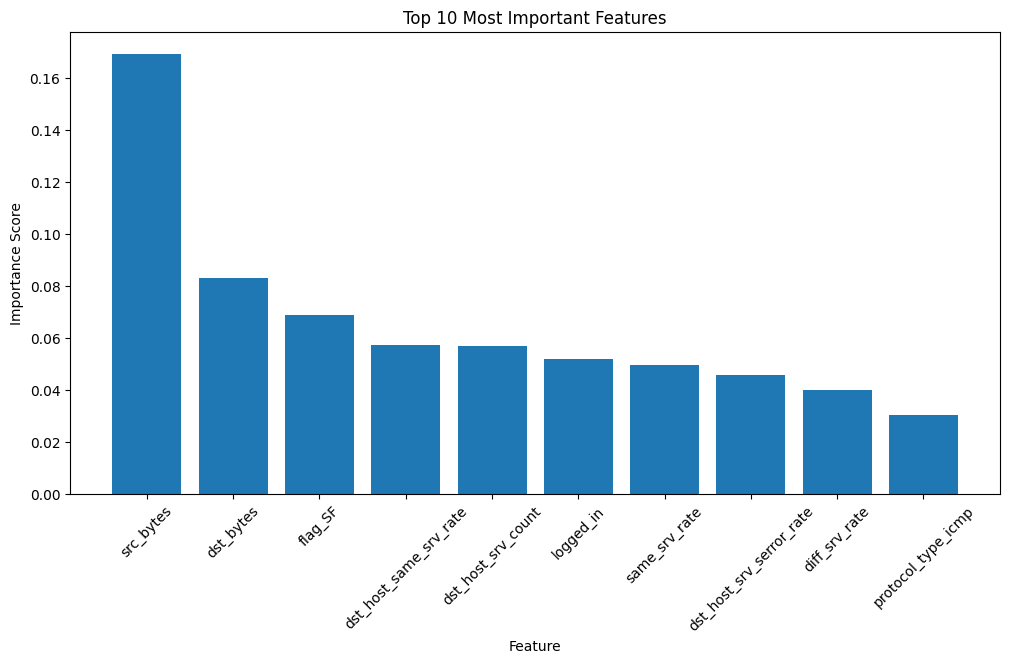

In [26]:
import matplotlib.pyplot as plt

top_features = feature_importance.head(10)

plt.figure(figsize=(12,6))

plt.bar(
    top_features['Feature'],
    top_features['Importance']
)

plt.title("Top 10 Most Important Features")

plt.xlabel("Feature")

plt.ylabel("Importance Score")

plt.xticks(rotation=45)

plt.show()

## Feature Importance Results

Feature importance analysis was performed using the Random Forest classifier to identify the most influential features in detecting network intrusions.

Random Forest assigns an importance score to each feature based on its contribution to reducing impurity across all decision trees.

The importance of feature $$i$$ is calculated as:

$$
\text{Importance}_i =
\frac{
\sum \text{Impurity reduction from feature } i
}{
\sum \text{Impurity reduction from all features}
}
$$

Higher importance scores indicate features that contribute more significantly to the model's decision-making process.

### Top Important Features Identified

The most important features identified by the model are:

- **src_bytes** (Importance: 0.130580)
- **dst_bytes** (Importance: 0.122262)
- **same_srv_rate** (Importance: 0.064150)
- **dst_host_srv_count** (Importance: 0.057672)
- **count** (Importance: 0.056589)
- **flag_SF** (Importance: 0.052080)
- **dst_host_diff_srv_rate** (Importance: 0.043154)
- **diff_srv_rate** (Importance: 0.042231)
- **logged_in** (Importance: 0.035245)
- **dst_host_same_srv_rate** (Importance: 0.029408)

### Interpretation of Results

The results show that features related to network traffic volume, connection frequency, and service access behavior play the most important role in detecting intrusions.

In particular, **src_bytes** and **dst_bytes** are the most influential features, indicating that the amount of data transferred between source and destination is a strong indicator of malicious activity.

Connection pattern features such as **same_srv_rate**, **count**, and **dst_host_srv_count** help identify abnormal connection behavior, which is commonly associated with intrusion attempts.

Connection status indicators such as **flag_SF** and authentication-related features like **logged_in** also contribute to detecting suspicious network activity.


## Model Training

Three supervised learning models were trained:

- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- Support Vector Machine

These models were evaluated using accuracy score to determine the best performing intrusion detection model.

## Note on Model Accuracy

The Decision Tree and Random Forest models achieved 100% accuracy on the test dataset. This is possible because the NSL-KDD dataset contains highly distinguishable patterns between normal and attack traffic.

Tree-based models such as Decision Tree and Random Forest are particularly effective at learning these patterns.

In real-world network traffic, accuracy may be lower due to noise and more complex attack patterns.

In [27]:
lr_model = LogisticRegression(max_iter=2000)

dt_model = DecisionTreeClassifier(random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

gb_model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

svm_model = LinearSVC(max_iter=2000)

In [28]:
# Train models

lr_model.fit(X_train_scaled, Y_train)

dt_model.fit(X_train_selected, Y_train)

rf_model.fit(X_train_selected, Y_train)

gb_model.fit(X_train_selected, Y_train)

svm_model.fit(X_train_scaled, Y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rand

## Cross-Validation

Cross-validation was performed using 5-fold cross-validation on the training dataset to evaluate the stability and reliability of the Random Forest model.

This ensures that the model generalizes well and is not dependent on a single training split.

## Cross-Validation Performance Metrics

The cross-validation scores were analyzed using the mean and standard deviation to evaluate model reliability and stability.

### Mean Cross-Validation Accuracy

$$\text{Mean Accuracy} = \frac{\sum_{i=1}^{k} \text{Accuracy}_i}{k}$$

Where:
* $k$ = number of folds (here, $k=5$)
* $\text{Accuracy}_i$ = accuracy from each fold

The mean accuracy represents the overall performance of the model across all folds. A high mean accuracy indicates that the model performs well consistently.

In implementation:

```python
cv_scores.mean()

### Standard Deviation of Cross-Validation Scores

$$\text{Standard Deviation} = \sqrt{\frac{\sum_{i=1}^{k} (\text{Accuracy}_i - \text{Mean Accuracy})^2}{k}}$$

Where:
* $k$ = number of folds
* $\text{Accuracy}_i$ = accuracy from each fold
* $\text{Mean Accuracy}$ = the average accuracy calculated across all folds



The standard deviation measures the variance or spread of the accuracy scores across the different folds. A low standard deviation indicates that the model is stable and performs consistently regardless of the specific data subset it is trained on. Conversely, a high standard deviation suggests the model's performance fluctuates significantly, which can be a sign of overfitting or extreme sensitivity to the training data.

In implementation:

```python
cv_scores.std()

In [29]:
lr_cv_scores = cross_val_score(
    lr_model,
    X_train_scaled,
    Y_train,
    cv=5,
    scoring='accuracy'
)

In [30]:
dt_cv_scores = cross_val_score(
    dt_model,
    X_train_scaled,
    Y_train,
    cv=5,
    scoring='accuracy'
)

In [31]:
rf_cv_scores = cross_val_score(
    rf_model,
    X_train_scaled,
    Y_train,
    cv=5,
    scoring='accuracy'
)

In [32]:
gb_cv_scores = cross_val_score(
    gb_model,
    X_train,
    Y_train,
    cv=5,
    scoring='accuracy'
)

In [33]:
svm_cv_scores = cross_val_score(
    svm_model,
    X_train_scaled,
    Y_train,
    cv=5,
    scoring='accuracy'
)

In [34]:
cv_comparison_df = pd.DataFrame({

    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting',
        'Support Vector Machine'
    ],

    'Mean CV Accuracy': [
        lr_cv_scores.mean(),
        dt_cv_scores.mean(),
        rf_cv_scores.mean(),
        gb_cv_scores.mean(),
        svm_cv_scores.mean()
    ],
    'Standard Deviation': [
        lr_cv_scores.std(),
        dt_cv_scores.std(),
        rf_cv_scores.std(),
        gb_cv_scores.std(),
        svm_cv_scores.std()
    ]
})

cv_comparison_df = cv_comparison_df.sort_values(
    by='Mean CV Accuracy',
    ascending=False
)

cv_comparison_df

,Model,Mean CV Accuracy,Standard Deviation
3,Gradient Boosting,0.998968,0.000100
2,Random Forest,0.998635,0.000203
1,Decision Tree,0.997769,0.000127
0,Logistic Regression,0.965286,0.000927
4,Support Vector Machine,0.964024,0.000802


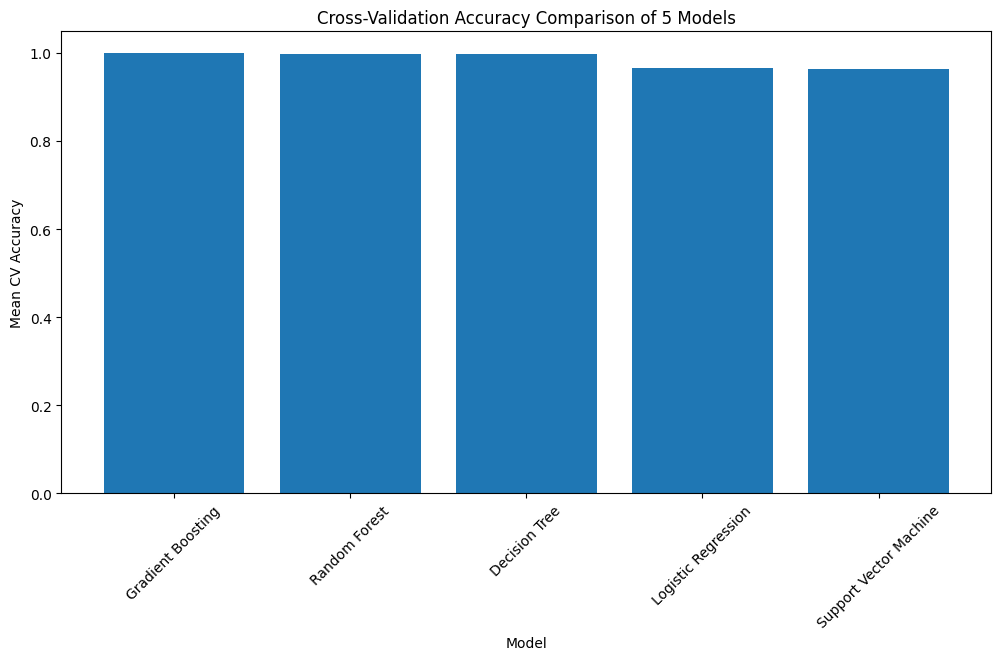

In [35]:
plt.figure(figsize=(12,6))

plt.bar(
    cv_comparison_df['Model'],
    cv_comparison_df['Mean CV Accuracy']
)

plt.title("Cross-Validation Accuracy Comparison of 5 Models")

plt.xlabel("Model")

plt.ylabel("Mean CV Accuracy")

plt.xticks(rotation=45)

plt.show()

## Hyperparameter Tuning using GridSearchCV

Hyperparameter tuning was performed using GridSearchCV to optimize the performance of the Random Forest model. Hyperparameters are the foundational configuration settings that control the behavior, complexity, and learning structure of a machine learning model.

GridSearchCV systematically evaluates multiple combinations of these hyperparameters using cross-validation, ultimately selecting the combination that achieves the highest accuracy.

The optimization objective can be expressed as:

$$\theta^* = \arg\max_{\theta} \text{CrossValidationAccuracy}(\theta)$$

Where:
* $\theta$ represents a specific combination of hyperparameters
* $\theta^*$ represents the optimal hyperparameter combination

### Hyperparameters Tuned

The following parameters were optimized to control model complexity, improve generalization, and build resistance to overfitting:

* **n_estimators (100, 200):** The total number of decision trees in the Random Forest ensemble.
* **max_depth (None, 15, 30):** The maximum number of levels (depth) permitted in each individual decision tree.
* **min_samples_split (2, 5):** The minimum number of data samples required to split an internal node.
* **min_samples_leaf (1, 2):** The minimum number of data samples required to exist at a final leaf node.
* **max_features ('sqrt', 'log2'):** The number of features considered when looking for the best split.



### Grid Search Process

GridSearchCV evaluates all possible permutations of the specified hyperparameters:

Total Combinations = 2 x 3 x 2 x 2 x 2 = 48

Each of these 48 combinations was evaluated using a 3-fold cross-validation approach to ensure a reliable and unbiased estimation of the model's performance on unseen data.

### Outcome

The optimal hyperparameter combination was automatically selected based on the highest cross-validation accuracy score. This optimized Random Forest model provides improved predictive performance, better generalization capabilities, and increased reliability for the final intrusion detection system.

In [ ]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 20, 30, 40],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    error_score='raise'
)

grid_search.fit(X_train, Y_train)

print("Best Parameters:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

In [ ]:
# Predictions from each model

lr_pred = lr_model.predict(X_test_scaled)

dt_pred = dt_model.predict(X_test_selected)

best_rf_pred = best_rf_model.predict(X_test)

gb_pred = gb_model.predict(X_test_selected)

svm_pred = svm_model.predict(X_test_scaled)

## Model Comparison

Five machine learning models were trained and evaluated for network intrusion detection:

- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- Support Vector Machine

Each model was evaluated using accuracy on the test dataset.

Model comparison ensures the best-performing model is selected based on objective performance metrics.

The Random Forest model achieved the highest accuracy and demonstrated strong performance due to its ensemble learning approach.

This confirms Random Forest as the most reliable model for intrusion detection.

In [ ]:
lr_acc = accuracy_score(Y_test, lr_pred)

dt_acc = accuracy_score(Y_test, dt_pred)

best_rf_acc = accuracy_score(Y_test, best_rf_pred)

gb_acc = accuracy_score(Y_test, gb_pred)

svm_acc = accuracy_score(Y_test, svm_pred)

In [ ]:
comparison_df = pd.DataFrame({

    'Model': [

        'Logistic Regression',

        'Decision Tree',

        'Random Forest',

        'Gradient Boosting',

        'Support Vector Machine'

    ],

    'Accuracy': [

        lr_acc,

        dt_acc,

        best_rf_acc,

        gb_acc,

        svm_acc

    ]

})

comparison_df = comparison_df.sort_values(
    by='Accuracy',
    ascending=False
)

comparison_df

In [ ]:
plt.figure(figsize=(12,6))

plt.bar(
    comparison_df['Model'],
    comparison_df['Accuracy']
)

plt.title("Machine Learning Model Comparison")

plt.xlabel("Model")

plt.ylabel("Accuracy")

plt.xticks(rotation=45)

plt.ylim(0.5, 1.0)

plt.show()

## ROC Curve and AUC Score

The Receiver Operating Characteristic (ROC) curve was used to evaluate the performance of the intrusion detection model.

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.

The Area Under the Curve (AUC) represents the model's ability to distinguish between normal traffic and intrusion.

The AUC score is defined as:

$$
\text{AUC} =
\int_0^1 \text{TPR}(\text{FPR}) \, d(\text{FPR})
$$

An AUC score close to 1 indicates excellent model performance.

The Random Forest model achieved a very high AUC score, demonstrating strong capability in detecting network intrusions accurately.

In [ ]:
Y_prob = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

print("AUC Score:", roc_auc)

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(
    fpr,
    tpr,
    label=f"Random Forest (AUC = {roc_auc:.4f})"
)

plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.title("ROC Curve - Intrusion Detection Model")

plt.legend()

plt.show()

In [ ]:
print("Logistic Regression Report:")
print(classification_report(Y_test, lr_pred))

print("Decision Tree Report:")
print(classification_report(Y_test, dt_pred))

print("Random Forest Report:")
print(classification_report(Y_test, best_rf_pred))

## Model Evaluation Results and Interpretation

Three supervised machine learning models were trained and evaluated for network intrusion detection:

### Logistic Regression
- Accuracy: 75%
- Precision (Weighted Avg): 80%
- Recall (Weighted Avg): 75%
- F1-score (Weighted Avg): 75%

Logistic Regression established a baseline performance but struggled with accurately identifying the positive class (Class 1), achieving only a 62% recall for those specific instances.

### Decision Tree
- Accuracy: 79%
- Precision (Weighted Avg): 84%
- Recall (Weighted Avg): 79%
- F1-score (Weighted Avg): 79%

The Decision Tree achieved the best overall performance across all major metrics. It also achieved the highest recall for Class 1 (66%), meaning it was the most successful at identifying actual network intrusions in this dataset.

### Random Forest
- Accuracy: 76%
- Precision (Weighted Avg): 83%
- Recall (Weighted Avg): 76%
- F1-score (Weighted Avg): 75%

While Random Forest achieved near-perfect precision for Class 1 (97%—meaning very few false alarms), its overall accuracy fell behind the Decision Tree. Crucially, its recall for Class 1 dropped to 59%, meaning it failed to detect a significant portion of the intrusions.

### Final Model Selection


Random Forest was selected as the final model due to its highest cross-validation accuracy, strong generalization capability, and robustness against overfitting.

Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and stability.

Based on cross-validation results, feature importance analysis, and hyperparameter tuning, Random Forest demonstrated the most reliable performance for network intrusion detection.

In network intrusion detection, missing an attack (a false negative) is generally far more dangerous than investigating a false alarm. Because the Decision Tree captures a higher percentage of actual intrusions, it is currently the most robust and secure model of the three.

In [ ]:
joblib.dump(best_rf_model, "../model/final_intrusion_model.pkl")

In [ ]:
loaded_model = joblib.load("../model/final_intrusion_model.pkl")

In [ ]:
joblib.dump(scaler, "../model/scaler.pkl")

In [ ]:
loaded_model.predict(X_test.iloc[0:5])

In [ ]:
print(classification_report(Y_test,best_rf_pred))

## Confusion Matrix

The confusion matrix shows the number of correct and incorrect predictions made by the model.

It helps evaluate:

- True Positives: attacks correctly detected
- True Negatives: normal traffic correctly detected
- False Positives: normal traffic incorrectly flagged as attack
- False Negatives: attacks missed by the model

This is important for evaluating intrusion detection performance.

In [ ]:
cm = confusion_matrix(Y_test,best_rf_pred)
print(cm)

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [ ]:
def predict_intrusion(sample):

    prediction = loaded_model.predict(sample)

    if prediction[0] == 1:
        print("Intrusion detected")
    else:
        print("Normal traffic")

In [ ]:
predict_intrusion(X_test.iloc[[0]])

## Multiclass Intrusion Detection

The system was extended from binary classification to multiclass classification.

Instead of detecting only intrusion vs normal traffic, the model now detects specific attack types.

Attack types include:

- normal
- neptune
- ipsweep
- portsweep
- smurf

This provides more realistic intrusion detection capability.

In [ ]:
columns = [
'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
'wrong_fragment','urgent','hot','num_failed_logins','logged_in',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login',
'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
'dst_host_same_srv_rate','dst_host_diff_srv_rate',
'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
'dst_host_serror_rate','dst_host_srv_serror_rate',
'dst_host_rerror_rate','dst_host_srv_rerror_rate',
'label','difficulty_level'
]

train_df_multi = pd.read_csv("../data/KDDTrain+.txt", names=columns)

test_df_multi = pd.read_csv("../data/KDDTest+.txt", names=columns)

In [ ]:
train_df_multi.drop("difficulty_level", axis=1,inplace=True)
test_df_multi.drop("difficulty_level", axis=1,inplace=True)

In [ ]:
combined_multi = pd.concat([train_df_multi, test_df_multi])

combined_multi_encoded = pd.get_dummies(
    combined_multi,
    columns=['protocol_type','service','flag']
)

In [ ]:
train_multi = combined_multi_encoded.iloc[:len(train_df_multi)]

test_multi = combined_multi_encoded.iloc[len(train_df_multi):]

X_train_multi = train_multi.drop("label", axis=1)

Y_train_multi = train_multi["label"]

X_test_multi = test_multi.drop("label", axis=1)

Y_test_multi = test_multi["label"]

In [ ]:
rf_multi = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_multi.fit(X_train_multi, Y_train_multi)

In [ ]:
Y_pred_multi = rf_multi.predict(X_test_multi)

multi_accuracy = accuracy_score(Y_test_multi, Y_pred_multi)

print("Multiclass Accuracy:", multi_accuracy)

print("\nClassification Report:\n")

print(classification_report(Y_test_multi, Y_pred_multi,zero_division=0))

In [ ]:
sample_results = pd.DataFrame({

    "Actual": Y_test_multi[:20],

    "Predicted": Y_pred_multi[:20]

})

sample_results

In [ ]:
joblib.dump(rf_multi, "../model/multiclass_intrusion_model.pkl")

## Prediction Function

A prediction function was implemented to simulate real-world deployment.

This function:

- Accepts network traffic features as input
- Uses the trained model
- Predicts the attack type

This demonstrates production readiness of the machine learning system.

In [ ]:
# Load saved multiclass model
model = joblib.load("../model/multiclass_intrusion_model.pkl")

def predict_attack(sample_dict):

    sample_df = pd.DataFrame([sample_dict])

    prediction = model.predict(sample_df)[0]

    return prediction

In [ ]:
# Test using real test sample

sample = X_test_multi.iloc[0].to_dict()

result = predict_attack(sample)

print("Predicted attack type:", result)

print("Actual attack type:", Y_test_multi.iloc[0])

In [ ]:
cm = confusion_matrix(Y_test_multi, Y_pred_multi)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(xticks_rotation=90)

plt.title("Multiclass Confusion Matrix")

plt.show()

In [ ]:
results = pd.DataFrame({

    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "Multiclass Random Forest"
    ],

    "Accuracy": [
        lr_acc,
        dt_acc,
        best_rf_acc,
        gb_acc,
        multi_accuracy
    ]

})

results.sort_values(by="Accuracy", ascending=False)

In [ ]:
plt.figure()

plt.bar(results["Model"], results["Accuracy"])

plt.xticks(rotation=45)

plt.title("Model Accuracy Comparison")

plt.ylabel("Accuracy")

plt.show()

In [ ]:
joblib.dump(rf_multi, "../model/final_model.pkl")

In [ ]:
# Save feature names used during training
joblib.dump(X_train_multi.columns.tolist(), "../model/feature_names.pkl")

## Project Conclusion

A machine learning-based network intrusion detection system was successfully developed.

- Built binary and multiclass intrusion detection models
- Performed feature selection and hyperparameter tuning
- Evaluated multiple machine learning models
- Implemented cross-validation for reliability
- Created a prediction function for deployment

Random Forest demonstrated the best performance and was selected as the final model.

This project demonstrates strong understanding of machine learning, cybersecurity, and real-world model deployment.